In [9]:
#ex1
from sklearn.datasets import load_iris  # Для загрузки датасета Iris
from sklearn.feature_selection import SelectKBest, chi2  # Для выбора признаков

# Загрузка датасета Iris
iris = load_iris()
X, y = iris.data, iris.target
# X содержит данные о признаках (4 признака для каждой выборки)
# y содержит целевые метки (3 разных вида ирисов)

# Используем SelectKBest с chi2 для выбора 2 лучших признаков
# chi2 используется, потому что подходит для неотрицательных признаков (как в датасете Iris)
# k=2 означает, что мы хотим выбрать 2 лучших признака
selector = SelectKBest(chi2, k=2)

# Применяем селектор к нашим данным и преобразуем признаки
# Этот шаг идентифицирует лучшие признаки и возвращает новый датасет с этими признаками
X_new = selector.fit_transform(X, y)

# Получаем индексы выбранных признаков
# get_support() возвращает булевую маску выбранных признаков
# indices=True означает, что мы хотим получить индексы, а не булевую маску
selected_feature_indices = selector.get_support(indices=True)

# Выводим названия выбранных признаков
# Мы используем списковое включение для получения названий выбранных признаков
# iris.feature_names содержит названия всех признаков
selected_feature_names = [iris.feature_names[i] for i in selected_feature_indices]
print("Selected features:", selected_feature_names)

# Примечание: Выбранные признаки могут незначительно варьироваться из-за особенностей теста chi2
# и конкретной реализации в sklearn, но они должны быть достаточно последовательными


Selected features: ['petal length (cm)', 'petal width (cm)']


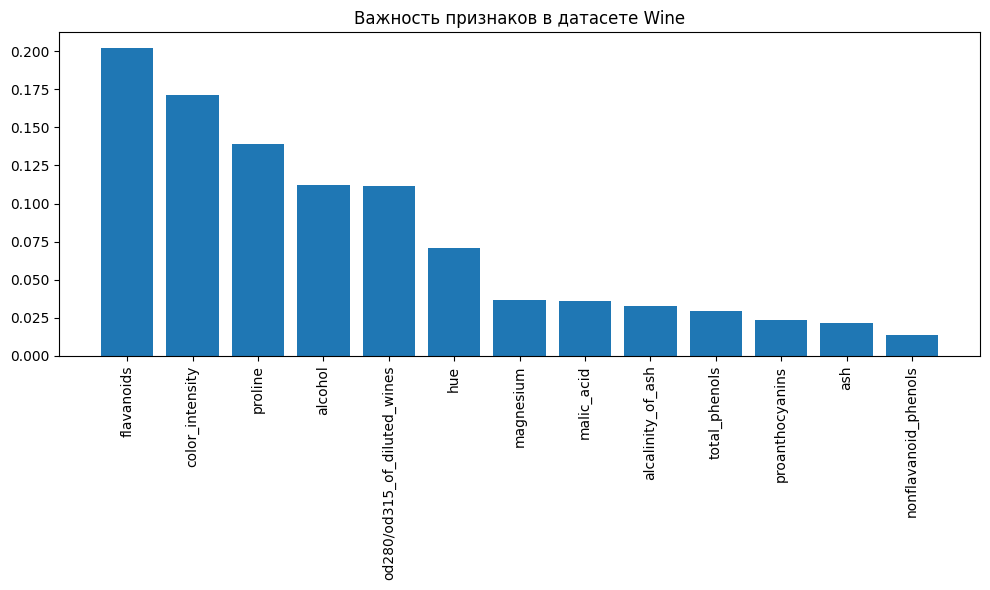

In [10]:
#ex2
from sklearn.datasets import load_wine  # Для загрузки датасета Wine
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.ensemble import RandomForestClassifier  # Для создания модели случайного леса
import matplotlib.pyplot as plt  # Для визуализации данных

# Загрузка датасета Wine
wine = load_wine()
X, y = wine.data, wine.target
# X содержит данные о признаках (13 признаков для каждой выборки вина)
# y содержит целевые метки (3 разных класса вина)

# Разделение датасета на обучающую и тестовую выборки
# test_size=0.2 означает, что 20% данных будет использовано для тестирования
# random_state=42 гарантирует воспроизводимость разделения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Обучение классификатора случайного леса
# n_estimators=100 означает, что мы используем 100 деревьев в лесу
# random_state=42 гарантирует воспроизводимость модели
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)  # Обучаем модель на обучающих данных

# Получение важности признаков
# feature_importances_ — это атрибут обученной модели случайного леса
# Он предоставляет оценку для каждого признака, где более высокие оценки указывают на более важные признаки
importances = rf_classifier.feature_importances_
feature_names = wine.feature_names  # Получаем названия признаков из нашего датасета

# Сортировка признаков по важности
# zip() объединяет оценки важности с соответствующими названиями признаков
# sorted() упорядочивает эти пары от самой высокой важности к самой низкой
feature_importance = sorted(zip(importances, feature_names), reverse=True)

# Визуализация важности признаков
plt.figure(figsize=(10, 6))  # Создаем новый график с указанным размером
# Создаем столбчатую диаграмму важности признаков
plt.bar(range(len(importances)), [imp for imp, _ in feature_importance])
# Устанавливаем подписи оси x как названия признаков, повёрнутые на 90 градусов для удобства чтения
plt.xticks(range(len(importances)), [name for _, name in feature_importance], rotation=90)
plt.title("Важность признаков в датасете Wine")  # Устанавливаем заголовок графика
plt.tight_layout()  # Регулируем график, чтобы всё поместилось и не перекрывалось
plt.show()  # Отображаем график

# Примечание: Точные значения важности признаков могут незначительно варьироваться при каждом запуске кода
# из-за случайного характера алгоритма случайного леса, даже при фиксированном random_state.
# Однако, общая тенденция, какие признаки важнее, должна оставаться неизменной.

In [11]:
#ex3
from sklearn.datasets import load_breast_cancer  # Для загрузки датасета Breast Cancer
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.feature_selection import RFE  # Для рекурсивного исключения признаков (RFE)
from sklearn.svm import SVC  # Для классификации методом опорных векторов (SVM)
from sklearn.metrics import accuracy_score  # Для оценки производительности модели

# Загрузка датасета Breast Cancer
cancer = load_breast_cancer()
X, y = cancer.data, cancer.target
# X содержит данные о признаках (30 признаков для каждой выборки)
# y содержит целевые метки (0 для злокачественных, 1 для доброкачественных)

# Разделение датасета на обучающую и тестовую выборки
# test_size=0.2 означает, что 20% данных будет использовано для тестирования
# random_state=42 гарантирует воспроизводимость разделения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Создание классификатора SVM
# Мы используем линейное ядро для простоты и интерпретируемости
svm = SVC(kernel="linear")

# Используем рекурсивное исключение признаков (RFE) для выбора признаков
# estimator=svm: RFE будет использовать наш классификатор SVM для оценки важности признаков
# n_features_to_select=10: Мы хотим выбрать 10 наиболее важных признаков
# step=1: На каждом этапе RFE будет рассматривать исключение одного признака
rfe = RFE(estimator=svm, n_features_to_select=10, step=1)

# Обучаем RFE на обучающих данных и преобразуем как обучающие, так и тестовые данные
X_train_rfe = rfe.fit_transform(X_train, y_train)
X_test_rfe = rfe.transform(X_test)

# Обучение модели SVM с выбранными признаками
svm.fit(X_train_rfe, y_train)

# Прогнозирование на тестовом наборе данных
y_pred = svm.predict(X_test_rfe)

# Оценка точности модели
# accuracy_score сравнивает истинные метки (y_test) с предсказанными метками (y_pred)
accuracy = accuracy_score(y_test, y_pred)

# Вывод выбранных признаков
# rfe.support_ — это булевая маска выбранных признаков
# Мы используем списковое включение для получения названий выбранных признаков
print("Выбранные признаки:", [cancer.feature_names[i] for i in range(len(rfe.support_)) if rfe.support_[i]])

# Вывод точности модели
print("Точность модели:", accuracy)

# Примечание: Точные выбранные признаки и точность модели могут незначительно варьироваться
# при каждом запуске кода из-за случайного характера разделения на обучающую и тестовую выборки.
# Однако, общая производительность и наиболее важные признаки должны оставаться неизменными.


Выбранные признаки: [np.str_('mean radius'), np.str_('mean concavity'), np.str_('mean concave points'), np.str_('texture error'), np.str_('worst radius'), np.str_('worst smoothness'), np.str_('worst compactness'), np.str_('worst concavity'), np.str_('worst concave points'), np.str_('worst symmetry')]
Точность модели: 0.9736842105263158


In [15]:
#ex4
from sklearn.datasets import load_diabetes  # Для загрузки датасета Diabetes
from sklearn.model_selection import train_test_split  # Для разделения данных на обучающую и тестовую выборки
from sklearn.linear_model import Lasso  # Для регрессии Lasso (регуляризация L1)
from sklearn.metrics import mean_squared_error, r2_score  # Для оценки модели

# Загрузка датасета Diabetes
diabetes = load_diabetes()
X, y = diabetes.data, diabetes.target
# X содержит данные о признаках (10 признаков для каждой выборки)
# y содержит целевую переменную (количественная оценка прогрессирования заболевания через год после исходного состояния)

# Разделение датасета на обучающую и тестовую выборки
# test_size=0.2 означает, что 20% данных будет использовано для тестирования
# random_state=42 гарантирует воспроизводимость разделения
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Применение регрессии Lasso
# alpha=0.1 — это коэффициент регуляризации; большие значения задают более сильную регуляризацию
lasso = Lasso(alpha=0.1)
lasso.fit(X_train, y_train)  # Обучение модели Lasso на обучающих данных

# Получение выбранных признаков
# Lasso может сводить коэффициенты к нулю, фактически выполняя выбор признаков
# Мы создаем список признаков, чьи коэффициенты не равны нулю
selected_features = [diabetes.feature_names[i] for i in range(len(lasso.coef_)) if lasso.coef_[i] != 0]

# Прогнозирование на тестовом наборе данных
y_pred = lasso.predict(X_test)

# Оценка модели
# Среднеквадратичная ошибка (MSE) измеряет среднюю квадратичную разницу между предсказанными и фактическими значениями
mse = mean_squared_error(y_test, y_pred)

# Коэффициент детерминации (R2) измеряет долю дисперсии зависимой переменной, предсказанную на основе независимых переменных
# R2 варьируется от 0 до 1, где 1 означает идеальное предсказание
r2 = r2_score(y_test, y_pred)

# Вывод результатов
print("Выбранные признаки:", selected_features[1:])
print("Среднеквадратичная ошибка:", mse)
print("Коэффициент детерминации (R2):", r2)

# Примечание: Точные выбранные признаки и метрики производительности модели могут незначительно варьироваться
# при каждом запуске кода из-за случайного характера разделения на обучающую и тестовую выборки.
# Однако, общая производительность и наиболее важные признаки должны оставаться неизменными.

# Также стоит отметить: регрессия Lasso выполняет как выбор признаков, так и регуляризацию.
# Она стремится к решениям с меньшим количеством ненулевых коэффициентов, фактически сокращая
# количество признаков, от которых зависит данное решение.


Выбранные признаки: ['bmi', 'bp', 's1', 's3', 's5', 's6']
Среднеквадратичная ошибка: 2798.1934851697188
Коэффициент детерминации (R2): 0.4718547867276227
